# Random Forest Code : Classification Algorithm

# 1.Business Problem Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [2]:
df=pd.read_csv("penguins.csv")
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# Data Preprocessing : EDA

In [4]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [6]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [7]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

In [8]:
df=df[df['sex']!='.']
df.shape

(344, 7)

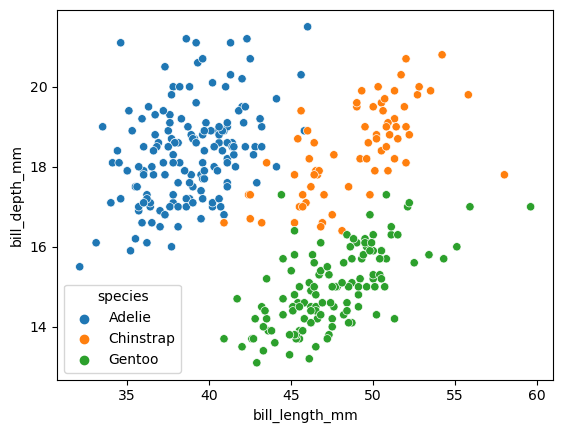

In [9]:
sns.scatterplot(x='bill_length_mm',y='bill_depth_mm',data=df,hue='species')
plt.show()

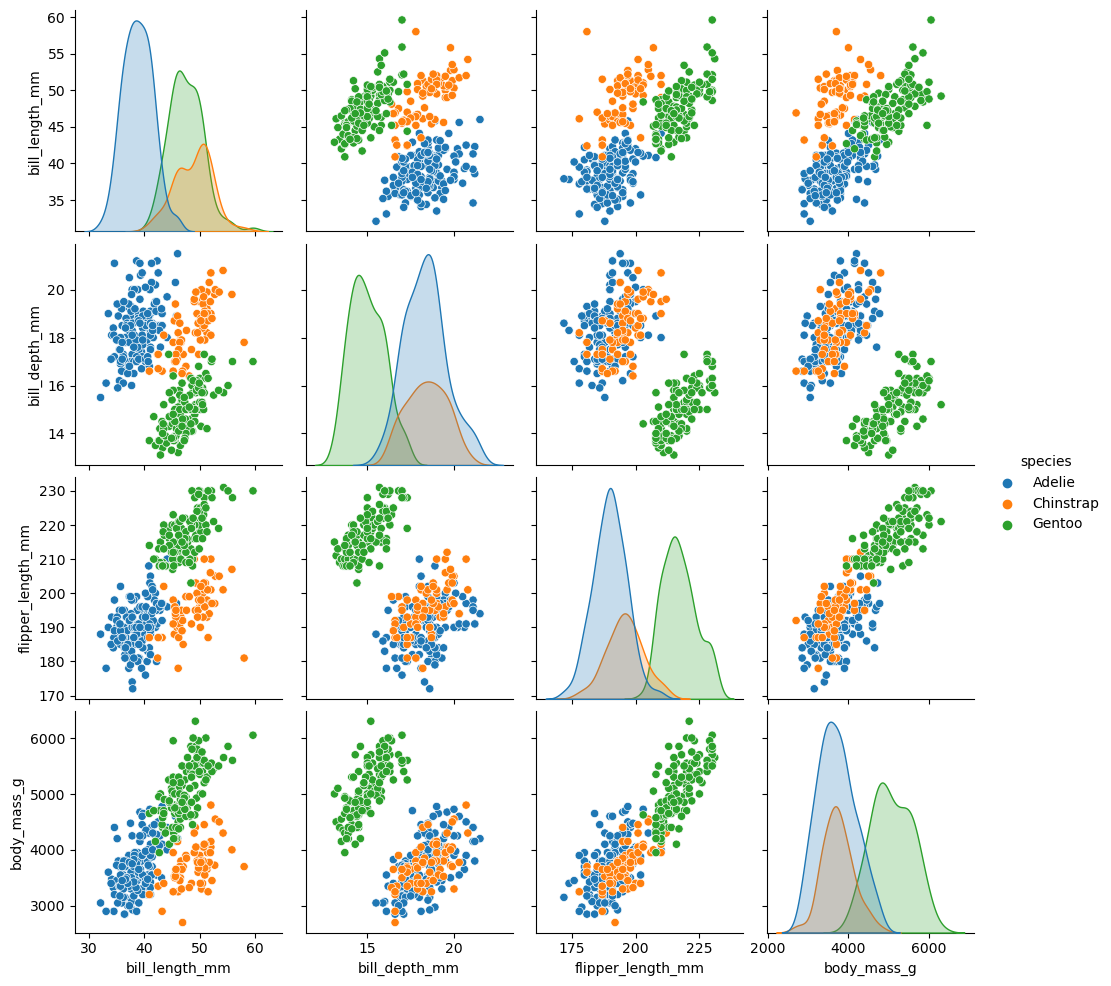

In [10]:
sns.pairplot(df,hue='species')
plt.show()

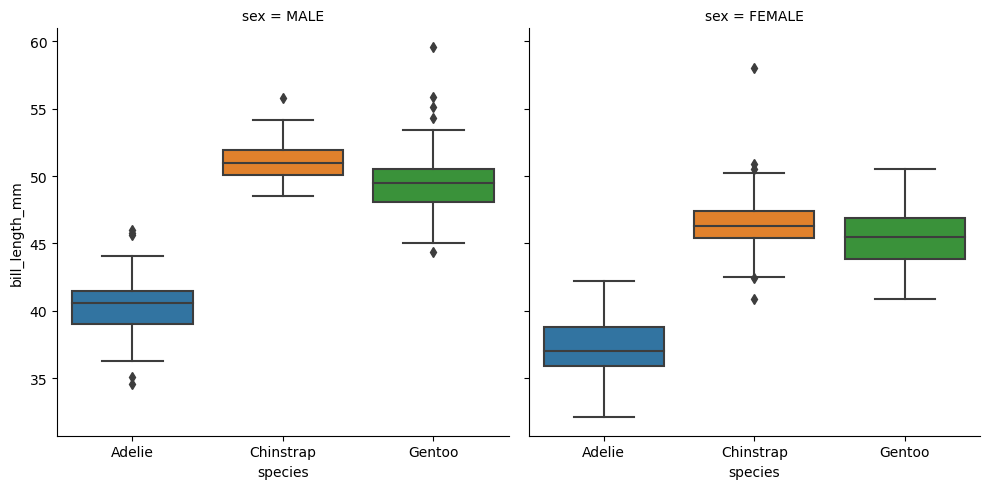

In [11]:
sns.catplot(x='species',y='bill_length_mm',data=df,kind='box',col='sex')
plt.show()

# Feature Engineering

In [12]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [13]:
df=df.dropna()
df.shape

(333, 7)

In [14]:
df = df[df['sex']!='.']
df.shape

(333, 7)

#X & y

In [15]:
X=pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y=df['species']

# Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.3,random_state=101)

# Modelling

#Random Forest Classifier with default parameters

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
model=RandomForestClassifier()

In [19]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [20]:
ypred_train=model.predict(X_train)

In [21]:
ypred_test=model.predict(X_test)

# Evaluation

In [22]:
from sklearn.metrics import accuracy_score
print("Train accuracy:",accuracy_score(ypred_train,y_train))
print("Train accuracy:",accuracy_score(ypred_test,y_test))

Train accuracy: 1.0
Train accuracy: 0.98


In [23]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


C:\Users\vasan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


NameError: name 'plot' is not defined

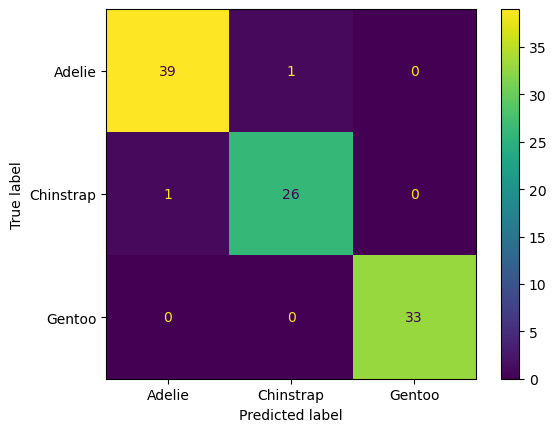

In [24]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test)
plot.show()

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        40
   Chinstrap       0.96      0.96      0.96        27
      Gentoo       1.00      1.00      1.00        33

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [26]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X,y,cv=5)
print("Cross Validation Score :",scores.mean())

Cross Validation Score : 0.9940298507462686


# Feature Importance

In [27]:
model.feature_importances_

array([0.32967201, 0.14743882, 0.28285916, 0.12440688, 0.09010014,
       0.01928428, 0.0062387 ])

In [28]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

Importance
bill_length_mm       0.329672
bill_depth_mm        0.147439
flipper_length_mm    0.282859
body_mass_g          0.124407
island_Dream         0.090100
island_Torgersen     0.019284
sex_MALE             0.006239

# HyperParameter Tuning

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
#model
estimator = RandomForestClassifier()

#Parameters (which you want to tune and identify the best)
param_grid = {'n_estimators':list(range(1,101))}

In [31]:
grid=GridSearchCV(estimator,param_grid, scoring="accuracy",cv=5)

In [32]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [33]:
grid.best_params_

{'n_estimators': 14}